In [0]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import math
from sklearn.datasets import make_circles
import numpy as np
from sklearn.cluster import AgglomerativeClustering
 


In [0]:
def k_means(n_clusters,Data,labels_true,epsilon,minP,bad_epsilon,bad_minP):
  y_pred = KMeans(n_clusters=n_clusters,random_state=1).fit_predict(Data)
  y_pred1= KMeans(n_clusters=n_clusters,random_state=1).fit(Data)
  ylist = y_pred1.cluster_centers_
  cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
  cluster.fit_predict(Data)

  fig, axs = plt.subplots(3, 4,figsize=(20,15))
  axs[0,0].scatter(Data[:, 0], Data[:, 1], c=y_pred)
  axs[0,0].scatter(ylist[:,0],ylist[:,1], marker ='x')
  axs[0,0].set_title('K-means Clustering')


  axs[0,1].scatter(Data[:,0], Data[:,1], c=cluster.labels_, cmap='rainbow')
  axs[0,1].set_title('Hierarchical Clustering complete linkage')
  
  cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity ='euclidean', linkage='single')
  cluster.fit_predict(Data)
  axs[0,2].scatter(Data[:,0], Data[:,1], c=cluster.labels_, cmap='rainbow')
  axs[0,2].set_title('Hierarchical Clustering single linkage')

  distortions = []
  K = range(1,n_clusters)
  for k in K:
      kmeanModel = KMeans(n_clusters=k).fit(Data)
      kmeanModel.fit(Data)
      distortions.append(sum(np.min(cdist(Data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Data.shape[0]) 
  axs[0,3].plot(K, distortions, 'bx-')
  axs[0,3].set_xlabel('k')
  axs[0,3].set_ylabel('Distortion')
  axs[0,3].set_title('Elbow Chart')

  def calculate_kn_distance(Data,k):
    kn_distance = []
    for i in range(len(Data)):
        eucl_dist = []
        for j in range(len(Data)):
            eucl_dist.append(            
                math.sqrt(               
                    ((Data[i,0] - Data[j,0]) ** 2) +
                    ((Data[i,1] - Data[j,1]) ** 2)))
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])
    return kn_distance
  eps_dist = calculate_kn_distance(Data,4)
  axs[1,0].hist(eps_dist,bins=30)
  axs[1,0].set_ylabel('n')
  axs[1,0].set_xlabel('Epsilon distance')


  db = DBSCAN(eps=epsilon, min_samples=minP, metric='euclidean').fit(Data)


  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print('Statistics for Euclidean, no scaling')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
 # print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
        # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = Data[class_member_mask & core_samples_mask]
      axs[1,1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = Data[class_member_mask & ~core_samples_mask]
      axs[1,1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)

  axs[1,1].set_title('DBSCAN, Euclidean, no data scaling: %d' % n_clusters_ )
  ########Scaled Data, Same Metric#########
  ScaledData =(Data-Data.min())/(Data.max()-Data.min())
  ScaledData[:,0]=(Data[:,0]-Data[:,0].min())/(Data[:,0].max()-Data[:,0].min())
  ScaledData[:,1]=(Data[:,1]-Data[:,1].min())/(Data[:,1].max()-Data[:,1].min())


  db = DBSCAN(eps=epsilon, min_samples=minP, metric='euclidean').fit(ScaledData)


  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print('Statistics for Euclidean, scaling')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
  #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
        # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = ScaledData[class_member_mask & core_samples_mask]
      axs[1,2].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = ScaledData[class_member_mask & ~core_samples_mask]
      axs[1,2].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)

  axs[1,2].set_title('DBSCAN, Euclidean,  data scaling: %d' % n_clusters_ )

  ########Same Data, Different Metric#########

  db = DBSCAN(eps=epsilon, min_samples=minP, metric='manhattan').fit(Data)


  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print('Statistics for Manhattan, no scaling')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
 # print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
        # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = Data[class_member_mask & core_samples_mask]
      axs[1,3].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = Data[class_member_mask & ~core_samples_mask]
      axs[1,3].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)

  axs[1,3].set_title('DBSCAN, Manhattan, no data scaling: %d' % n_clusters_ )
  ########Scaled Data, Different Metric#########
  db = DBSCAN(eps=epsilon, min_samples=minP, metric='manhattan').fit(ScaledData)


  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)


  print('Statistics for Manhattan, scaling')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
 # print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
        # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = ScaledData[class_member_mask & core_samples_mask]
      axs[2,0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = ScaledData[class_member_mask & ~core_samples_mask]
      axs[2,0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)

  axs[2,0].set_title('DBSCAN, Manhattan,  data scaling: %d' % n_clusters_ )
  ########Bad Params, Scaled Data, Same Metric#########
  #ListeX = Data.tolist()
  #ScaledData=[]
  #for i in range(len(ListeX)):
   # ScaledData.insert(i,[ListeX[i][0]*100,ListeX[i][1]])

  #ScaledData = np.array(ScaledData)

  db = DBSCAN(eps=bad_epsilon, min_samples=bad_minP, metric='euclidean').fit(ScaledData)


  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print('Statistics for Euclidean, scaling, bad Parameters')
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
  #print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Data, labels))

  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
        # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (labels == k)

      xy = ScaledData[class_member_mask & core_samples_mask]
      axs[2,1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=14)

      xy = ScaledData[class_member_mask & ~core_samples_mask]
      axs[2,1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
               markeredgecolor='k', markersize=6)

  axs[2,1].set_title('DBSCAN, Euclidean,  data scaling, bad result: eps:%d' % bad_epsilon )
  return fig

In [0]:
X_many, y_many = make_blobs(n_samples=8000, centers=20, n_features=2, center_box=(-20,20))

Statistics for Euclidean, no scaling
Estimated number of clusters: 12
Estimated number of noise points: 208
Homogeneity: 0.707
Completeness: 0.946
Adjusted Rand Index: 0.473
Adjusted Mutual Information: 0.706


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Statistics for Euclidean, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Statistics for Manhattan, no scaling
Estimated number of clusters: 14
Estimated number of noise points: 375
Homogeneity: 0.691
Completeness: 0.914
Adjusted Rand Index: 0.461
Adjusted Mutual Information: 0.690


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Statistics for Manhattan, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Statistics for Euclidean, scaling, bad Parameters
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


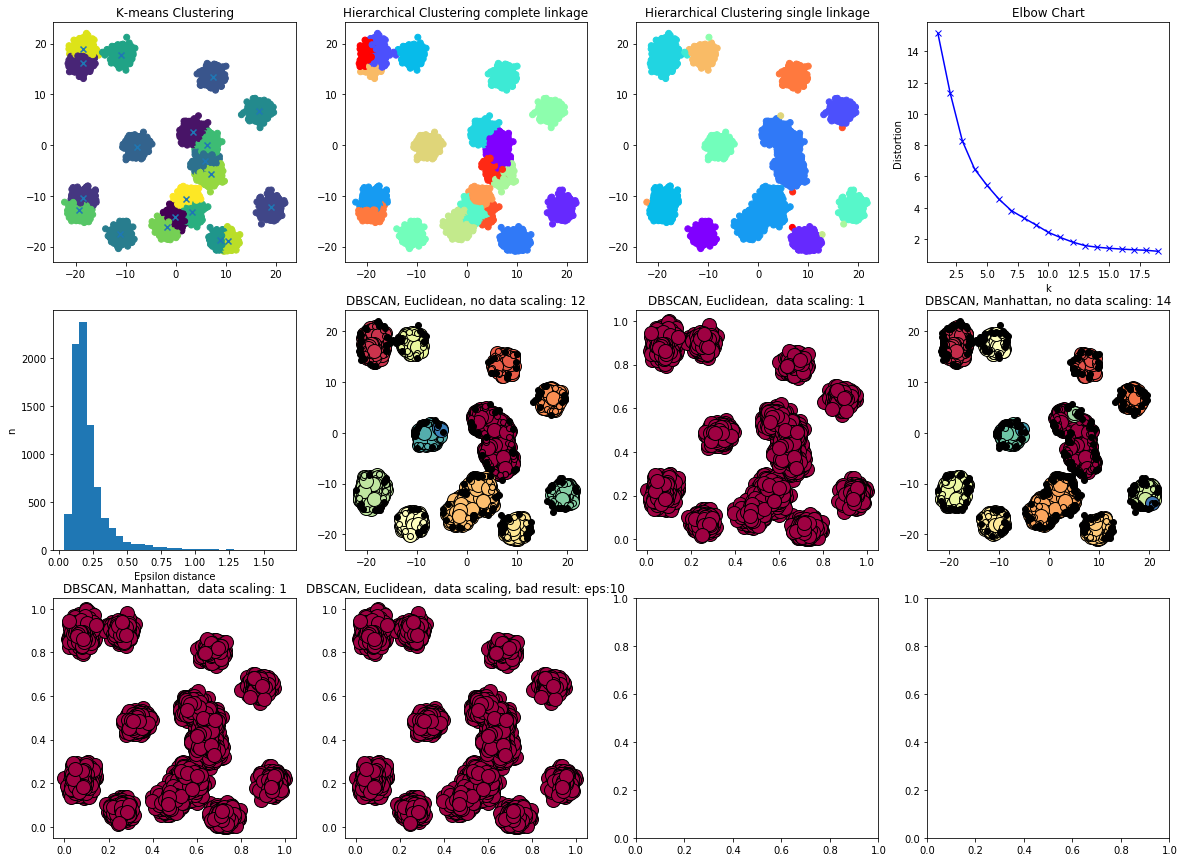

In [0]:
result_X_many = k_means(20,X_many,y_many,0.5,5,10,2)

In [0]:
X_circle, y_circle = make_circles(n_samples=400, factor=.3, noise=.05)

In [0]:
result_X_circle = k_means(3,X_circle,y_circle,0.15,4,20,1)

Statistics for Euclidean, no scaling
Estimated number of clusters: 2
Estimated number of noise points: 1
Homogeneity: 1.000
Completeness: 0.978
Adjusted Rand Index: 0.995
Adjusted Mutual Information: 0.978
Statistics for Euclidean, scaling
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Statistics for Manhattan, no scaling
Estimated number of clusters: 7
Estimated number of noise points: 3
Homogeneity: 1.000
Completeness: 0.437
Adjusted Rand Index: 0.588
Adjusted Mutual Information: 0.434
Statistics for Manhattan, scaling
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Statistics for Euclidean, scaling, bad Parameters
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 0.00

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='a

In [4]:
center1 = (20, 60)
center2 = (100, 20)
center3 = (50, 30)
distance = 20
bigdistance = 40

#Erstellen des 1. Clusters
x1 = np.random.uniform(center1[0], center1[0] + distance, size=(100,))
y1 = np.random.normal(center1[1], distance, size=(100,))
#Dazugehöriges Label 
label1 = [1]*100

#Erstellen des 2. Clusters
x2 = np.random.uniform(center2[0], center2[0] + distance, size=(100,))
y2 = np.random.normal(center2[1], distance, size=(100,)) 
label2 = [2]*100

#Erstellen des 3.Cluster
x3 = np.random.uniform(center3[0],center3[0]+bigdistance, size= (100,))
y3 = np.random.normal(center3[1], bigdistance, size=(100,))
label3 = [3]*100

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3,y3)
plt.title('Clusters with different cluster densities')
plt.show()
x1 = x1.tolist()
x2 = x2.tolist()
x3 = x3.tolist()

X=[]
for i in range(len(x1)):
  X.insert(i,[x1[i],y1[i]])
for i in range(len(x2)):
  X.insert(i+100,[x2[i],y2[i]])
for i in range(len(x3)):
  X.insert(i+200,[x3[i],y3[i]])


#### ERSTELLEN DES GELABELTEN CLUSTERS AUFGABE 8.1
##gelabelte Clusters 
labeledX = pd.DataFrame(dict(x1=x1+x2+x3,x2=y1.tolist()+y2.tolist()+y3.tolist(),label=label1+label2+label3))
label = label1 + label2 + label3

X_dens= np.array(X)

Statistics for Euclidean, no scaling
Estimated number of clusters: 7
Estimated number of noise points: 14
Homogeneity: 0.959
Completeness: 0.708
Adjusted Rand Index: 0.843
Adjusted Mutual Information: 0.703
Statistics for Euclidean, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Statistics for Manhattan, no scaling
Estimated number of clusters: 9
Estimated number of noise points: 18
Homogeneity: 0.949
Completeness: 0.619
Adjusted Rand Index: 0.767
Adjusted Mutual Information: 0.611
Statistics for Manhattan, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Statistics for Euclidean, scaling, bad Parameters
Estimated number of clusters: 0
Estimated number of noise points: 300
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='a

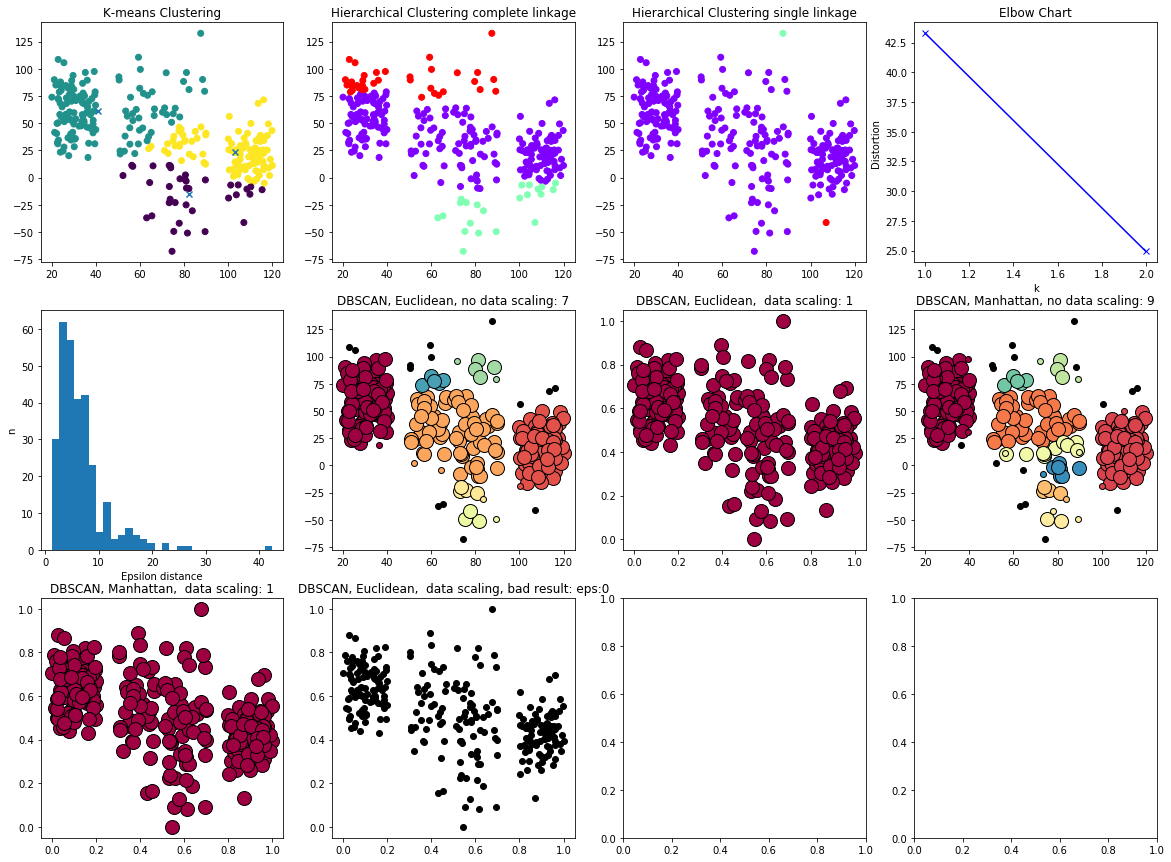

In [0]:
result_X_dens = k_means(3,X_dens,label,10,3,0.01,100)

In [5]:
#import matplotlib.pyplot as plt
center1 = (20, 60)
center2 = (100, 20)
center3 = (50, 30)
distance = 20
bigdistance = 40

#ERSTELLEN DER CLUISTER MIT ENTSPRECHENDEM LABEL
x1 = np.random.uniform(center1[0], center1[0] + distance, size=(100,))
y1 = np.random.normal(center1[1], distance, size=(100,)) 
label1 = [1]*100

x2 = np.random.uniform(center2[0], center2[0] + distance, size=(100,))
y2 = np.random.normal(center2[1], distance, size=(100,)) 
label2 = [2]*100

x3 = np.random.uniform(center3[0],center3[0]+bigdistance, size= (300,))
y3 = np.random.normal(center3[1], bigdistance, size=(300,))
label3 = [3]*300

labeledX = pd.DataFrame(dict(x1=x1.tolist()+x2.tolist()+x3.tolist(),x2=y1.tolist()+y2.tolist()+y3.tolist(),label=label1+label2+label3))
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3,y3)
plt.title('Clusters with different cluster sizes')
plt.show()
X=[]
for i in range(len(x1)):
  X.insert(i,[x1[i],y1[i]])
for i in range(len(x2)):
  X.insert(i+100,[x2[i],y2[i]])
for i in range(len(x3)):
  X.insert(i+200,[x3[i],y3[i]])
X_sizes= np.array(X)

label = label1 + label2 + label3

In [0]:
result_X_sizes = k_means(3,X_sizes,label,10,10,0.01,100)

Statistics for Euclidean, no scaling
Estimated number of clusters: 3
Estimated number of noise points: 49
Homogeneity: 0.903
Completeness: 0.728
Adjusted Rand Index: 0.826
Adjusted Mutual Information: 0.727
Statistics for Euclidean, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Statistics for Manhattan, no scaling
Estimated number of clusters: 5
Estimated number of noise points: 101
Homogeneity: 0.827
Completeness: 0.553
Adjusted Rand Index: 0.590
Adjusted Mutual Information: 0.550
Statistics for Manhattan, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Statistics for Euclidean, scaling, bad Parameters
Estimated number of clusters: 0
Estimated number of noise points: 500
Homogeneity: 0.000
Completeness: 1.000
Adjusted Rand Index:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='a

In [0]:
center1 = (20, 20)
distance = 20
bigdistance = 40


x1 = np.random.uniform(center1[0], center1[0] + distance, size=(1000,))
y1 = np.random.uniform(center1[1], center1[1]+ distance, size=(1000,)) 
label = [1]*1000

plt.scatter(x1, y1)
plt.title('Non-Cluster data')
plt.show()

X=[]
for i in range(len(x1)):
  X.insert(i,[x1[i],y1[i]])

X_noncluster= np.array(X)

In [0]:
result_X_noncluster = k_means(20,X_noncluster,label,0.8,4,0.1,100)

Statistics for Euclidean, no scaling
Estimated number of clusters: 10
Estimated number of noise points: 23
Homogeneity: 1.000
Completeness: -0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Statistics for Euclidean, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Statistics for Manhattan, no scaling
Estimated number of clusters: 69
Estimated number of noise points: 147
Homogeneity: 1.000
Completeness: -0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Statistics for Manhattan, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Statistics for Euclidean, scaling, bad Parameters
Estimated number of clusters: 0
Estimated number of noise points: 1000
Homogeneity: 1.000
Completeness: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_threeclus, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4)
Xy = pd.DataFrame(dict(x1=X_threeclus[:,0], x2=X_threeclus[:,1], label=labels_true))
groups = Xy.groupby('label')

Statistics for Euclidean, no scaling
Estimated number of clusters: 3
Estimated number of noise points: 122
Homogeneity: 0.833
Completeness: 0.671
Adjusted Rand Index: 0.740
Adjusted Mutual Information: 0.670
Statistics for Euclidean, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Statistics for Manhattan, no scaling
Estimated number of clusters: 4
Estimated number of noise points: 228
Homogeneity: 0.696
Completeness: 0.535
Adjusted Rand Index: 0.498
Adjusted Mutual Information: 0.533
Statistics for Manhattan, scaling
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: -0.000
Completeness: 1.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Statistics for Euclidean, scaling, bad Parameters
Estimated number of clusters: 748
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 0.166
Adjusted Rand I

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='a

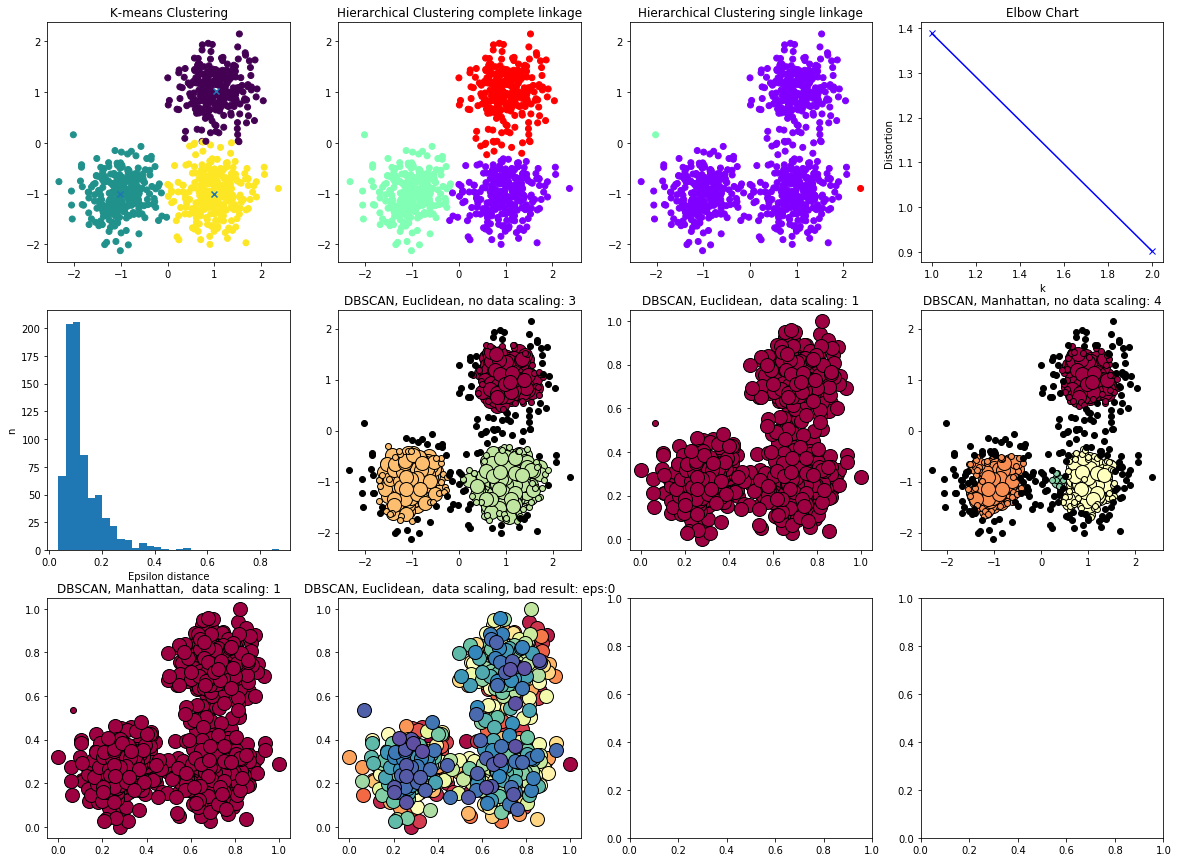

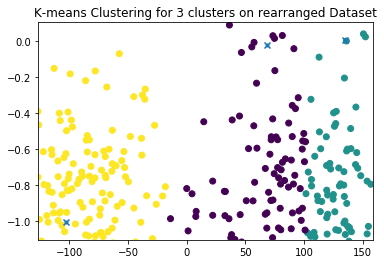

In [0]:
result_X_threeclus = k_means(3,X_threeclus,labels_true,0.2,10,0.001,1)


###REARRANGED DATASET ON ONE DIMENSION
ListeX = X_threeclus.tolist()
X_rearranged=[]
for i in range(len(ListeX)):
  X_rearranged.insert(i,[ListeX[i][0]*100,ListeX[i][1]])

X_rearranged = np.array(X_rearranged)


###KMEANS ON REARRANGED DATA SET
y_predrearranged = KMeans(n_clusters=3,random_state=1).fit_predict(X_rearranged)
y_pred1rearranged = KMeans(n_clusters=3,random_state=1).fit(X_rearranged)
ylistrearranged = y_pred1rearranged.cluster_centers_
vor = Voronoi(ylistrearranged)
voronoi_plot_2d(vor)
plt.scatter(X_rearranged[:, 0], X_rearranged[:, 1], c=y_predrearranged)
plt.scatter(ylistrearranged[:,0],ylistrearranged[:,1], marker ='x')
plt.title("K-means Clustering for 3 clusters on rearranged Dataset")
plt.show()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import warnings
import itertools
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt


Time Series of usage of Amazon Cloud (in Thousands)

In [8]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ec2_cpu_utilization_825cc2.csv')
data.plot()

FileNotFoundError: ignored

In [0]:
a = []
x = []
y=[]
for i in range(0, len(data)-1):
    a.append([i,data["value"][i]])    

X_real = a
X_real = StandardScaler().fit_transform(X_real)
for i in range(0,len(X)):
    x.append(X_real[i][0])
    y.append(X_real[i][1])

plt.scatter(x,y)
plt.show()

In [0]:
db = DBSCAN(eps=0.5, min_samples=200).fit(X_real)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

unique_labels = set(labels)
plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
for k in unique_labels:
    col=[0,0.5,1,1]
    if k == -1:
        col = [1, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col),markersize=5, alpha=0.5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col), markersize=5, alpha=0.5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 1


In [0]:
### NEW DATA SETS 
### 3-Dimension
centers = [[1, 1, 1], [-1, -1, -1], [1, -1, 1]]
X_3, y_3 = make_blobs(n_samples=750, centers=centers, cluster_std=0.4)


### 4-Dimension
centers = [[1,1,1,1],[-1,-1,-1,-1],[1,-1,-1,1],[-1,1,-1,1]]
X_4, y_4 = make_blobs(n_samples=750, centers=centers, cluster_std=0.3)


### 5-Dimension
centers = [[1,1,1,1,1],[-1,-1,-1,-1,-1],[1,1,0,-1,-1]]
X_5, y_5 = make_blobs(n_samples=750, centers=centers, cluster_std=0.3)


In [10]:
!pip install minisom
from minisom import MiniSom    


  Created wheel for minisom: filename=MiniSom-2.2.2-cp36-none-any.whl size=7263 sha256=ae172e1a5be4cd222029f7126a459392d90a54739f9ac6f7e13b1cfd27ff6603
  Stored in directory: /root/.cache/pip/wheels/4a/46/e1/605a71c70f6a19f16b44fc309f6557127591c69969476cf5d1
Successfully built minisom


In [0]:
som = MiniSom(6, 6, 4, sigma=0.5, learning_rate=0.5)
som.train(X_4, 100)

In [18]:
#label = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
from matplotlib.gridspec import GridSpec
%matplotlib inline
labels_map = som.labels_map(X_4, y_4)
label_names = np.unique(y_4)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.savefig('pie.png')
plt.show()

In [0]:
som = MiniSom(10, 10, 4, sigma=0.5, learning_rate=0.5)
som.train(X_4, 100)

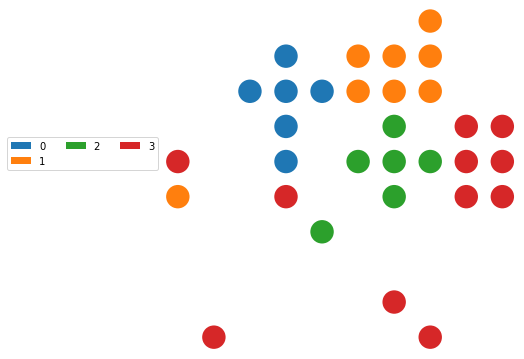

In [20]:
from matplotlib.gridspec import GridSpec
%matplotlib inline
labels_map = som.labels_map(X_4, y_4)
label_names = np.unique(y_4)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(11, 11)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.savefig('pie.png')

plt.show()

In [0]:
som = MiniSom(20, 20, 4, sigma=0.5, learning_rate=0.5)
som.train(X_4, 100)

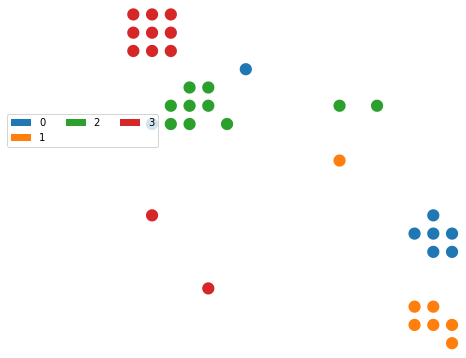

In [23]:
from matplotlib.gridspec import GridSpec
%matplotlib inline
labels_map = som.labels_map(X_4, y_4)
label_names = np.unique(y_4)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(21, 21)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.savefig('pie.png')
plt.show()

In [0]:
som = MiniSom(6, 6, 3, sigma=0.5, learning_rate=0.5)
som.train(X_3, 100)

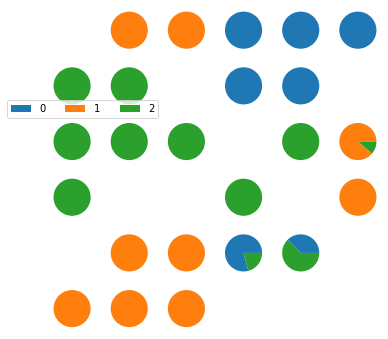

In [0]:
#label = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
from matplotlib.gridspec import GridSpec
%matplotlib inline
labels_map = som.labels_map(X_3, y_3)
label_names = np.unique(y_3)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.savefig('pie.png')
plt.show()

In [0]:
som = MiniSom(6, 6, 5, sigma=0.5, learning_rate=0.5)
som.train(X_5, 100)

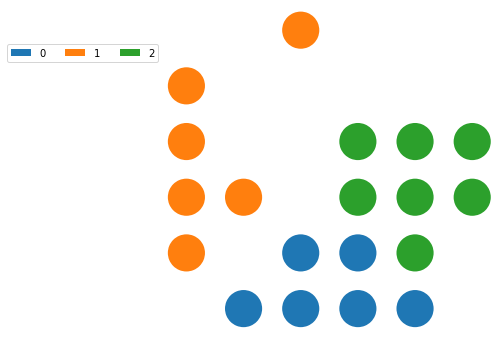

In [0]:
%matplotlib inline
labels_map = som.labels_map(X_5, y_5)
label_names = np.unique(y_5)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.savefig('pie.png')
plt.show()

SOM on 2-dimensional data, in this case the non-spherical data.

In [0]:
som = MiniSom(6, 6, 2, sigma=0.5, learning_rate=0.5)
som.train(X_circle, 100)

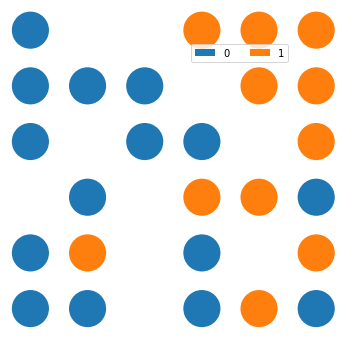

In [0]:
%matplotlib inline
labels_map = som.labels_map(X_circle, y_circle)
label_names = np.unique(y_circle)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.savefig('pie.png')
plt.show()

In [0]:
som = MiniSom(6, 6, 2, sigma=0.5, learning_rate=0.5)
som.train(X_real, 100)

In [0]:
%matplotlib inline
labels_map = som.labels_map(X_real, labels)
label_names = np.unique(labels)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.savefig('pie.png')
plt.show()